In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import glob
import cv2
import random
import time
import sys
import tifffile as tiff

In [2]:
file_path = 'images'
labels_path = 'labels'

DIR = os.getcwd()
DIR

'f:\\Cellula Internship cv\\satalite data\\data'

In [3]:
print("[INFO] : Load all the images.....")
ImgDir = os.path.join(DIR, file_path)
labelDir = os.path.join(DIR, labels_path)
imgs = glob.glob(ImgDir + '*\*.tif')
labels = glob.glob(labelDir + '*\*.png')
len(imgs), len(labels)

[INFO] : Load all the images.....


(306, 456)

In [4]:
imgs.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
labels.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

In [5]:
images = []
masks = []
def load_images(img, label):
    images.append(img)
    masks.append(label)
    return images, masks

f:\Cellula Internship cv\satalite data\data\images\50.tif
f:\Cellula Internship cv\satalite data\data\labels\50.png
(128, 128, 12) int16


Text(0.5, 1.0, 'Water Mask')

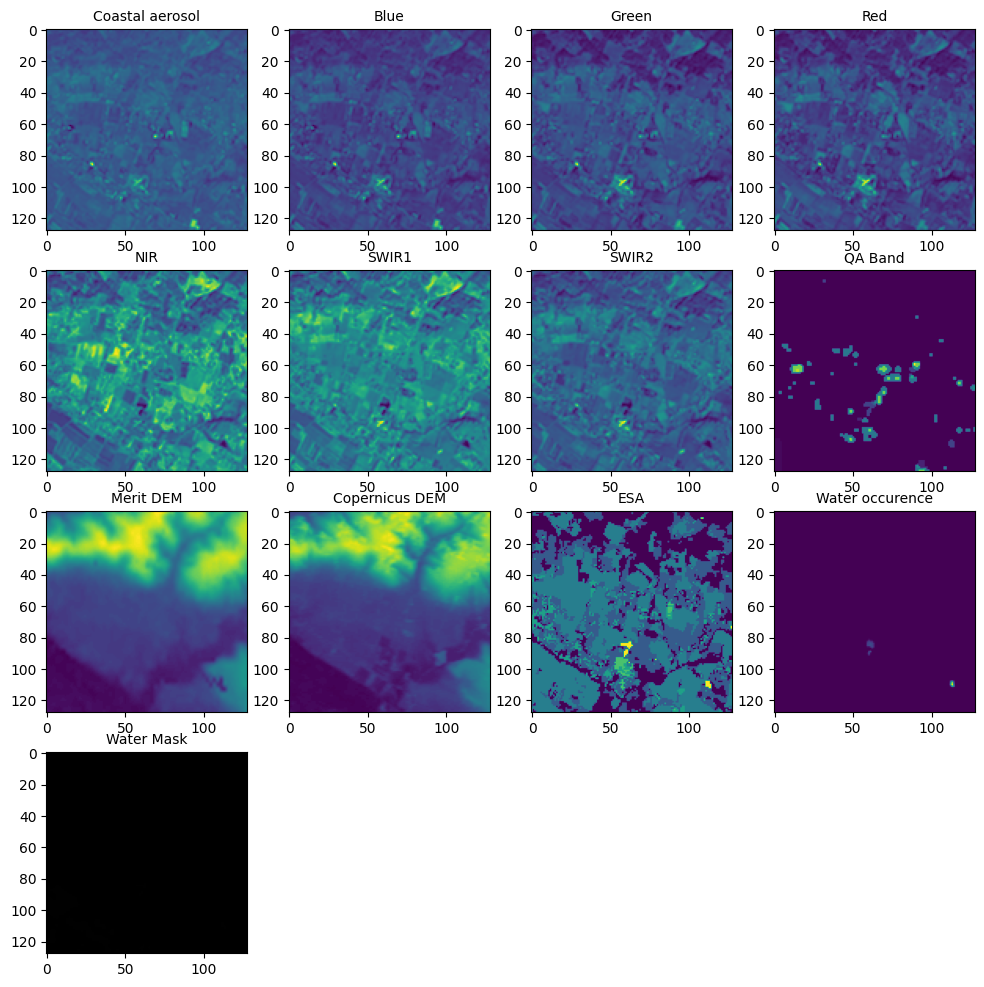

In [6]:
import tifffile as tiff
plt.figure(figsize=(12,12))
classes =['Coastal aerosol', 'Blue', 'Green', 'Red', 'NIR','SWIR1', 'SWIR2', 'QA Band', 'Merit DEM','Copernicus DEM','ESA','Water occurence']
i=50
im = imgs[i]
lab = labels[i]
print(im)
print(lab)
# Read the TIFF image
image = tiff.imread(im)

# Print shape and dtype
print(image.shape, image.dtype)
# Convert to NumPy array and visualize
for j in range(1, 13):
    plt.subplot(4,4,j)
    plt.imshow(image[:,:,j-1])
    plt.title(classes[j-1], fontsize=10)


label_img=cv2.imread(lab)
plt.subplot(4,4,13)
plt.imshow(label_img)
plt.title('Water Mask', fontsize=10)


In [7]:
X = []
Y =[]

for img,lab in zip(imgs,labels[:305]):
    images, masks = load_images(img, lab)
    x = tiff.imread(img)
    y = cv2.imread(lab, cv2.IMREAD_GRAYSCALE)
    X.append(x)
    Y.append(y)

In [8]:
X[0].shape, Y[0].shape

((128, 128, 12), (128, 128))

In [9]:
X = np.array(X)
Y = np.array(Y)

In [10]:
X.shape, Y.shape

((305, 128, 128, 12), (305, 128, 128))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((244, 128, 128, 12), (244, 128, 128), (61, 128, 128, 12), (61, 128, 128))

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dropout

In [15]:
from tensorflow.keras import layers, models

input_shape = x_train[0].shape
model = tf.keras.models.Sequential([

# Encoder
tf.keras.layers.Input(shape=input_shape),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2, 2),

# Bottleneck
tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same'),

# Decoder
tf.keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same'),
tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same'),
tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same'),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same'),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
history = model.fit(x_train, y_train, epochs=10, batch_size=1, validation_data=(x_test, y_test))

Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 172s 674ms/step - accuracy: 0.7301 - loss: 3.7457 - val_accuracy: 0.6757 - val_loss: 5.2271
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 147s 600ms/step - accuracy: 0.7723 - loss: 3.6695 - val_accuracy: 0.6757 - val_loss: 5.2271
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 141s 578ms/step - accuracy: 0.7306 - loss: 4.3421 - val_accuracy: 0.6757 - val_loss: 5.2271
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 140s 573ms/step - accuracy: 0.7701 - loss: 3.7059 - val_accuracy: 0.6757 - val_loss: 5.2271
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.7569 - loss: 3.9181 - val_accuracy: 0.6757 - val_loss: 5.2271
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 139s 571ms/step - accuracy: 0.7708 - loss: 3.6944 - val_accuracy: 0.6757 - val_loss: 5.2271
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 140s 572ms/step - accuracy: 0.7723 - loss: 3.6703 - val_accuracy: 0.6757 - val_loss: 5.2271
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 140s 574ms/step - accuracy: 0.7389 - lo

In [30]:
model_eval = model.evaluate(x_test,y_test)
print(f"Test loss: {model_eval[0]}")
print(f"Test accuracy: {model_eval[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6791 - loss: 5.1717
Test loss: 5.227062702178955
Test accuracy: 0.6757022142410278


<Axes: >

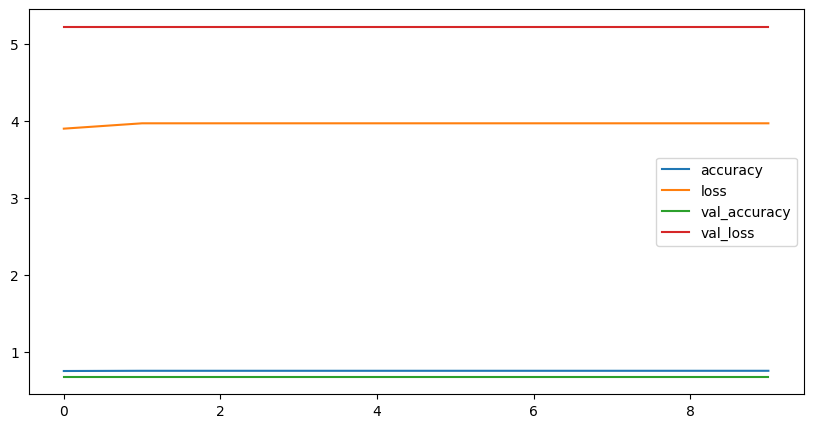

In [31]:
loss_acc_metrix_Df = pd.DataFrame(history.history)
loss_acc_metrix_Df.plot(figsize=(10,5))

In [13]:
# Find the maximum value in the dataset
max_value = np.max(x_train)

# Normalize x_train
x_train_scaled = x_train / max_value

# Transform x_test using the same normalization
x_test_scaled = x_test / max_value

In [16]:
history_2 = model.fit(x_train_scaled, y_train, epochs=10, batch_size=1, validation_data=(x_test_scaled, y_test))

Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 174s 693ms/step - accuracy: 0.7201 - loss: 0.7185 - val_accuracy: 0.6757 - val_loss: 0.6914
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 166s 678ms/step - accuracy: 0.7264 - loss: 0.5991 - val_accuracy: 0.6757 - val_loss: 0.6733
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 145s 590ms/step - accuracy: 0.7791 - loss: 0.5263 - val_accuracy: 0.6757 - val_loss: 0.6322
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 160s 656ms/step - accuracy: 0.7695 - loss: 0.5482 - val_accuracy: 0.6757 - val_loss: 0.6427
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 149s 611ms/step - accuracy: 0.7507 - loss: 0.5647 - val_accuracy: 0.6757 - val_loss: 0.6627
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 149s 610ms/step - accuracy: 0.7251 - loss: 0.6016 - val_accuracy: 0.6757 - val_loss: 0.7188
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 149s 609ms/step - accuracy: 0.7569 - loss: 0.5604 - val_accuracy: 0.6757 - val_loss: 0.6354
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 147s 602ms/step - accuracy: 0.7321 -

In [17]:
model_eval = model.evaluate(x_test_scaled,y_test)
print(f"Test loss: {model_eval[0]}")
print(f"Test accuracy: {model_eval[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6791 - loss: 0.6352
Test loss: 0.6387379169464111
Test accuracy: 0.6757022142410278


<Axes: >

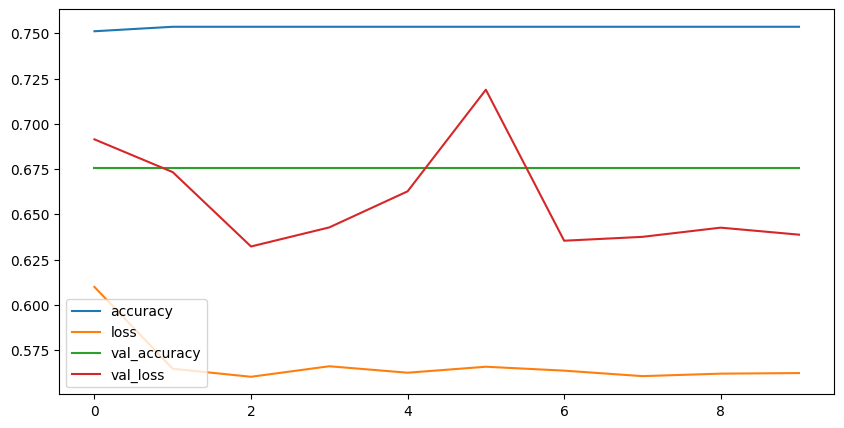

In [19]:
loss_acc_metrix_Df2 = pd.DataFrame(history_2.history)
loss_acc_metrix_Df2.plot(figsize=(10,5))